# BCI-Motor imagery Data Preprocessing

- Import data and check stimulus events

In [2156]:
import mne
import numpy as np
raw_edf = mne.io.read_raw_edf("C:\git\Senior_Thesis\DataSet\Convert_data\class3_pipo_edf.edf",preload = True)

Extracting EDF parameters from C:\git\Senior_Thesis\DataSet\Convert_data\class3_pipo_edf.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 107749  =      0.000 ...   430.996 secs...


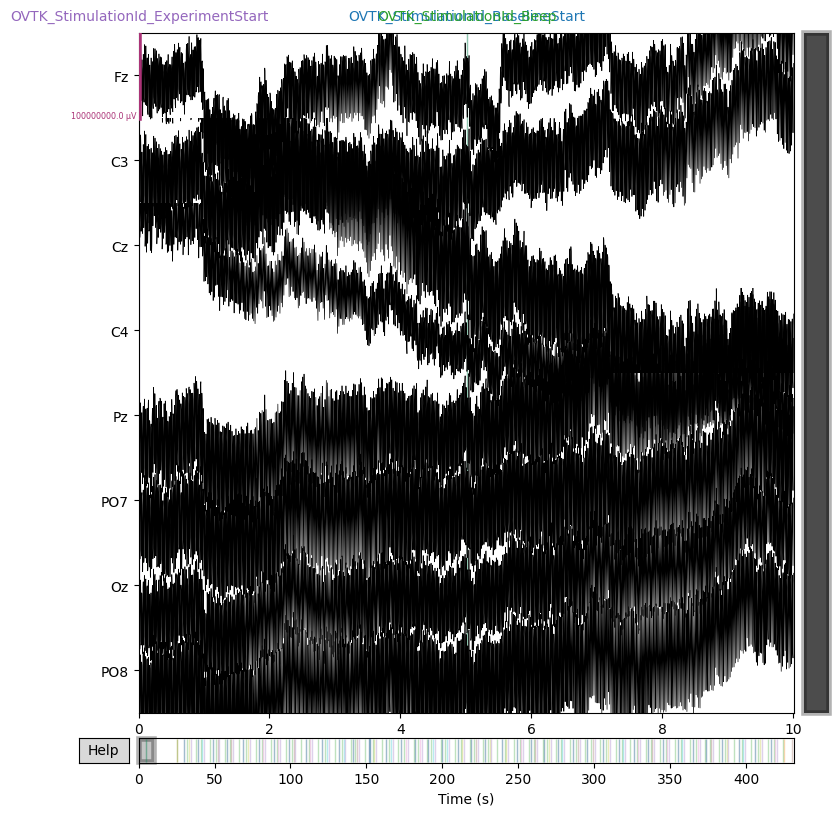

...


In [2157]:
raw_edf.plot(
    duration=10, 
    start=0.0, 
    scalings=50, # You may edit scalings value later
    )
print("...")

In [2158]:
max(raw_edf[6][0][0])

95823.09

# Feature Extraction

- MRCP , LF-ASD

In [2159]:
import sys
import matplotlib.pyplot as plt
sys.path.append("..")
from tsfilt import (
    BoxFilter, GaussianFilter, BilateralFilter, IdenticalFilter, NonLocalMeanFilter
)

In [2160]:
eeg1 = raw_edf.copy().filter(l_freq=1.0, h_freq=3.0, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
eeg1 = eeg1.copy().set_eeg_reference(ref_channels="average")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 3 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 1.00, 3.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


c:\Python311\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


In [2161]:
max(eeg1[0][0][0])

294.9128006203801

In [2162]:
eeg1= eeg1.pick_channels(['C3','Cz','C4'])
events, event_dict = mne.events_from_annotations(eeg1)
epochs = mne.Epochs(eeg1, events, 
        tmin=-1.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax=3.0,    # final timestamp (10 means set epoch duration 10 second)
        event_id=event_dict,
        preload = True,
        event_repeated='drop'
    )

Used Annotations descriptions: ['OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_End_Of_Session', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Feedback_Continuous', 'OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Tongue', 'OVTK_GDF_Up', 'OVTK_StimulationId_BaselineStart', 'OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Beep', 'OVTK_StimulationId_ExperimentStart', 'OVTK_StimulationId_Train']
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
205 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 205 events and 1126 original time points ...
2 bad epochs dropped


In [2163]:
def display(x, x_filt, title):
    plt.figure(figsize=(20, 3))
    plt.plot(x, "-", label="original")
    plt.plot(x_filt, "-", label="filtered")
    plt.title(title)
    plt.legend()
    plt.show()

WIN_SIZE = 1125
Select_channel = 3
filters = {
    # "box": BoxFilter(WIN_SIZE),
    "gaussian": GaussianFilter(WIN_SIZE, sigma_d=20),
    # "bilateral": BilateralFilter(WIN_SIZE, sigma_d=15, sigma_i=7.5),
    # "non local mean": NonLocalMeanFilter(WIN_SIZE)
}
# print(filters.items())
left_epochs = epochs['OVTK_GDF_Left']
right_epochs = epochs['OVTK_GDF_Right']
up_epochs = epochs['OVTK_GDF_Up']
for filter_name,filt in filters.items():
    for j in range(0,Select_channel):
        for i in range(0,len(epochs['OVTK_GDF_Left'])):
            left_filt = filt.fit_transform(left_epochs.get_data()[i][j])
            left_epochs._data[i][j] = left_filt
            right_filt = filt.fit_transform(right_epochs.get_data()[i][j])
            right_epochs._data[i][j] = right_filt
            up_filt = filt.fit_transform(up_epochs.get_data()[i][j])
            up_epochs._data[i][j] = up_filt

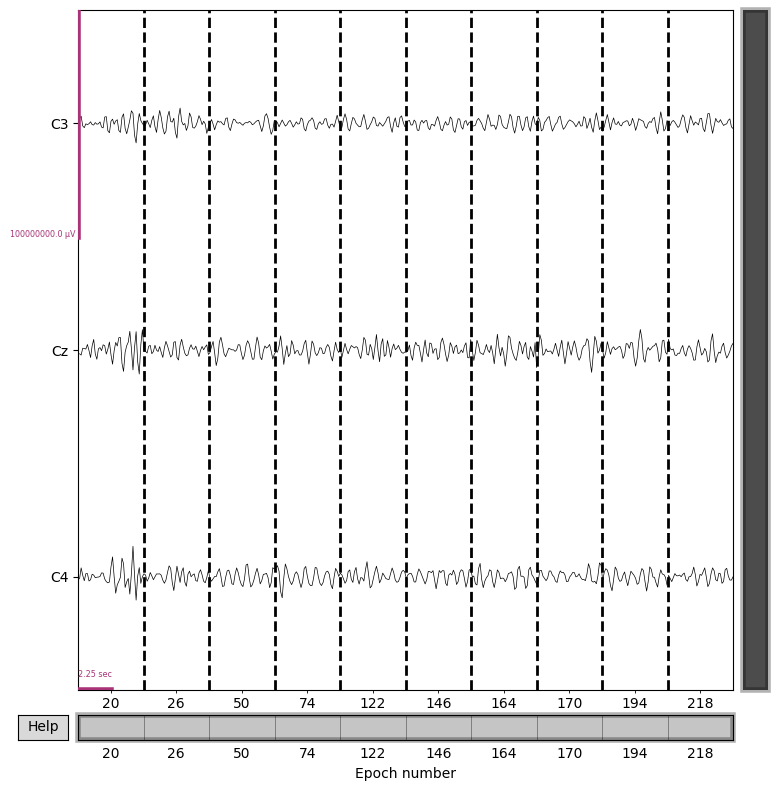

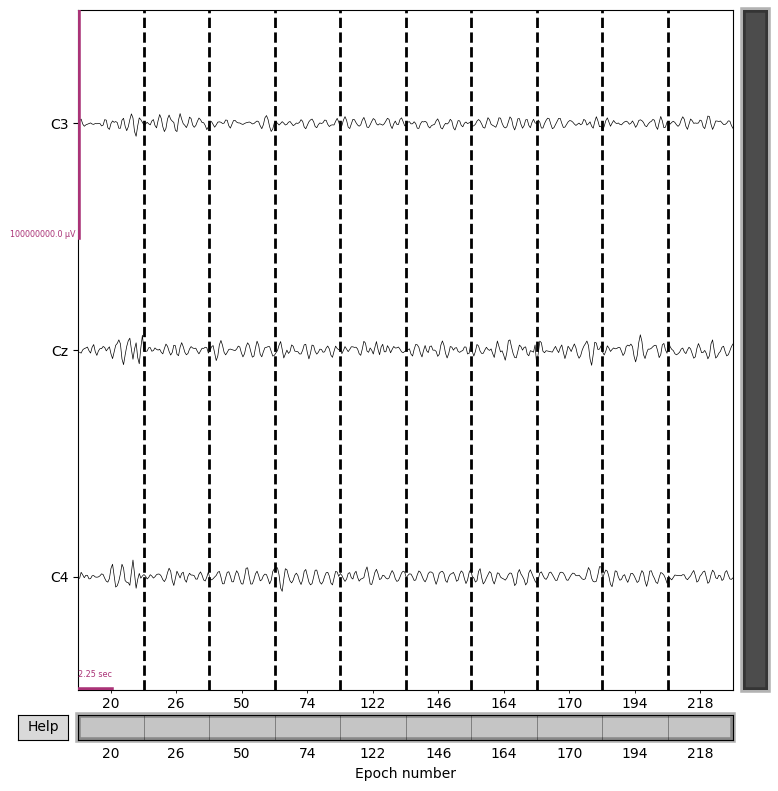

In [2164]:
epochs['OVTK_GDF_Left'].plot(
    scalings=50, # You may edit scalings value later
)
left_epochs.plot(
    scalings=50, # You may edit scalings value later
)
left = left_epochs['OVTK_GDF_Left'].average()

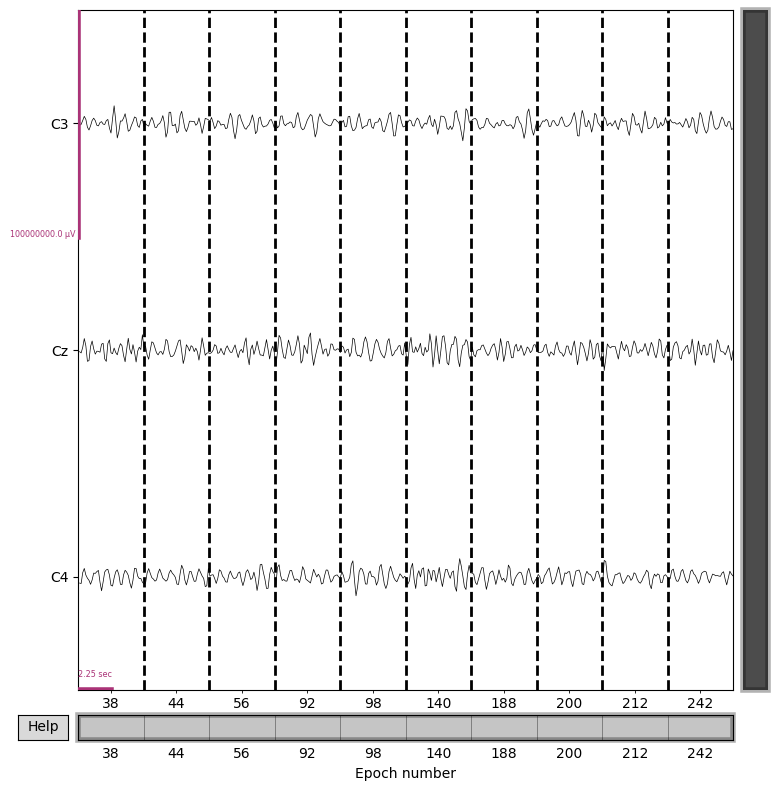

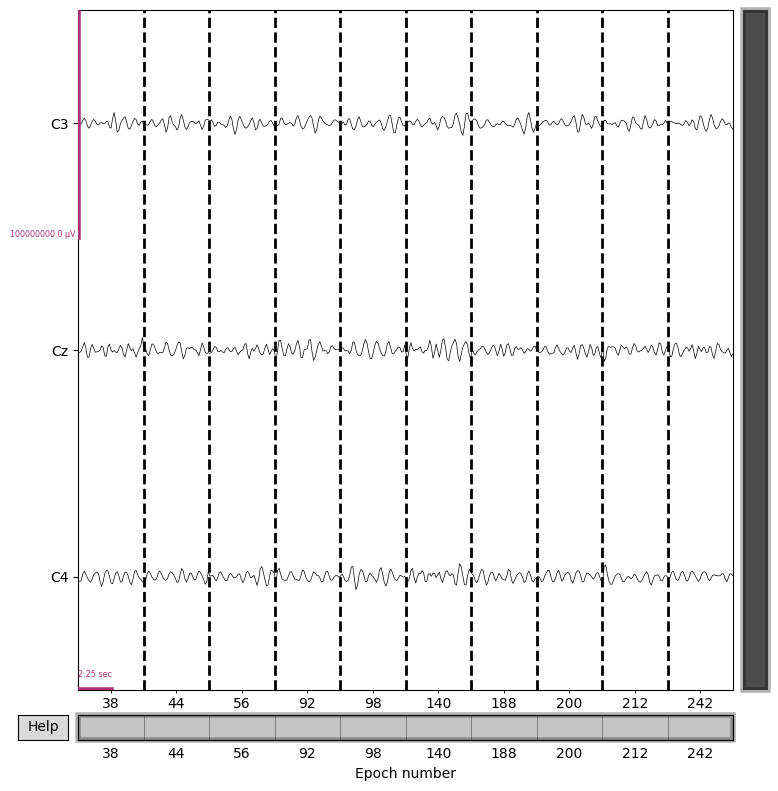

In [2165]:
epochs['OVTK_GDF_Right'].plot(
    scalings=50, # You may edit scalings value later
)
right_epochs.plot(
    scalings=50, # You may edit scalings value later
)
right = right_epochs['OVTK_GDF_Right'].average()

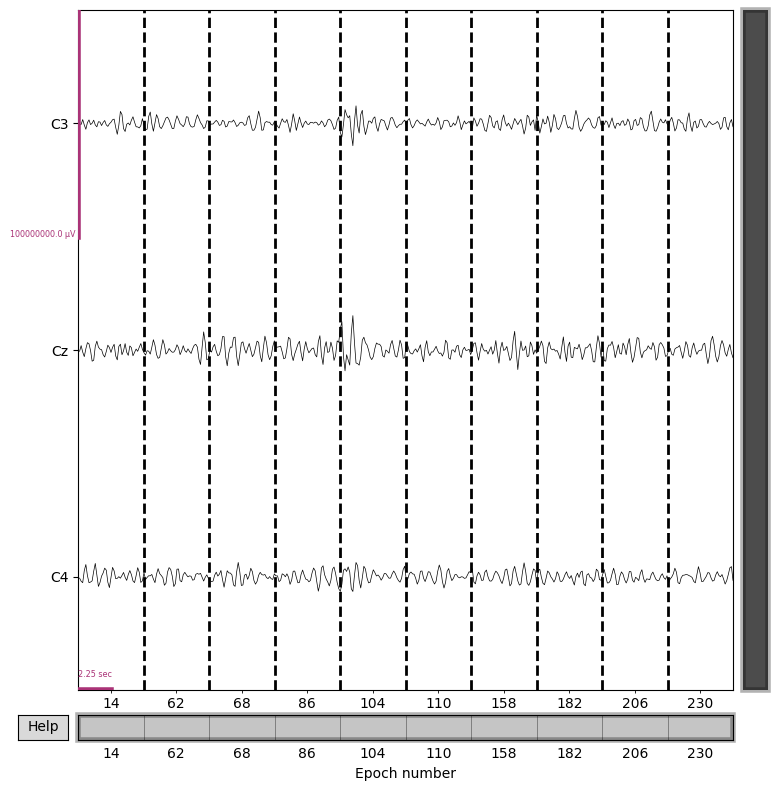

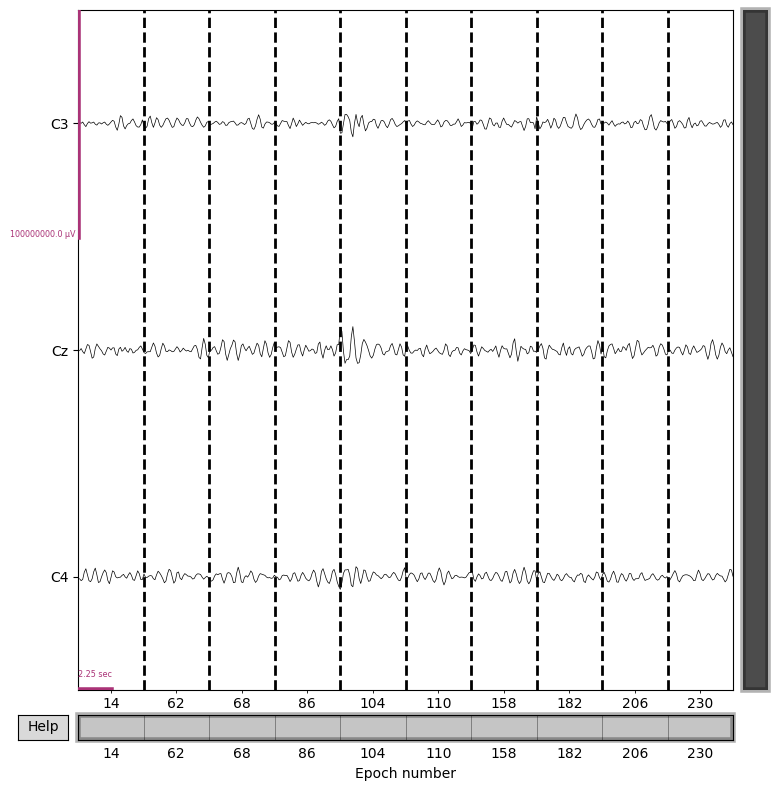

In [2166]:
epochs['OVTK_GDF_Up'].plot(
    scalings=50, # You may edit scalings value later
)
up_epochs.plot(
    scalings=50, # You may edit scalings value later
)
up = up_epochs['OVTK_GDF_Up'].average()

Need more than one channel to make topography for eeg. Disabling interactivity.


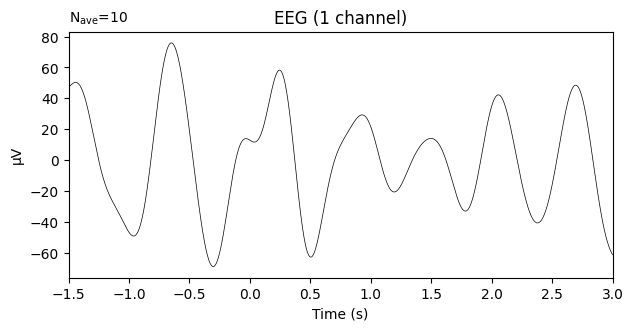

Need more than one channel to make topography for eeg. Disabling interactivity.


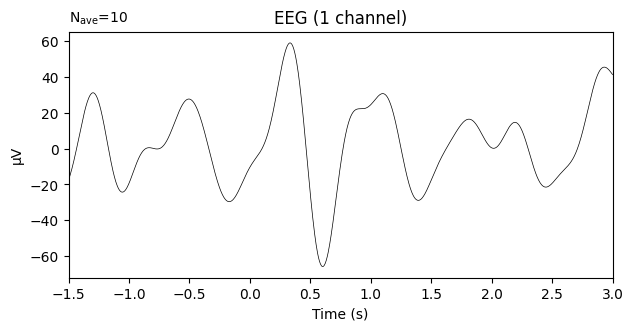

Need more than one channel to make topography for eeg. Disabling interactivity.


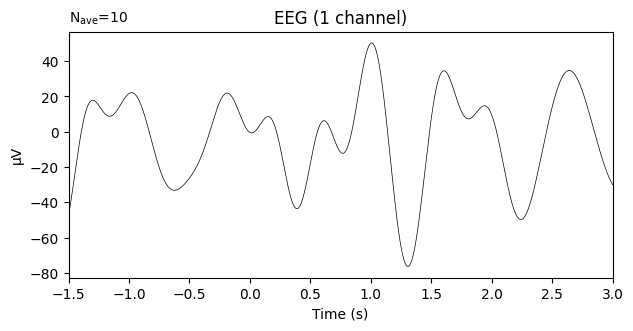

...


In [2167]:
up.plot(scalings=50, picks="Cz")
left.plot(scalings=50, picks="C4")
right.plot(scalings=50, picks="C3")
print("...")

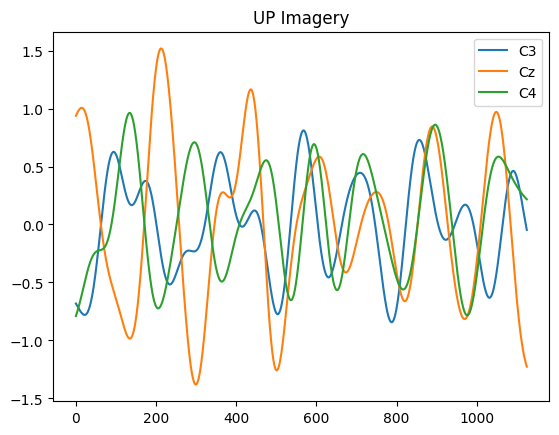

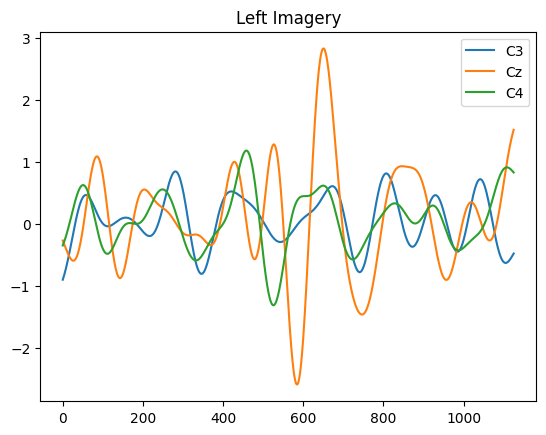

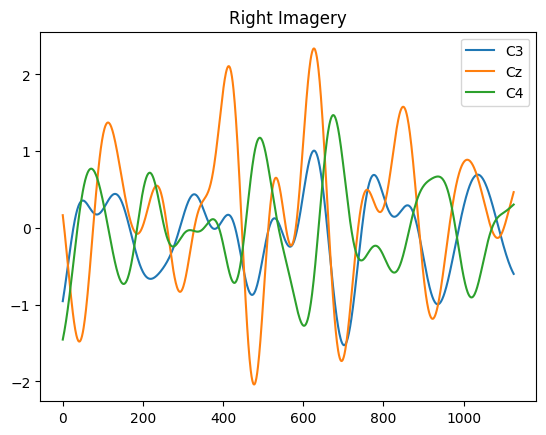

In [2168]:
plt.plot(up.get_data()[0],label='C3')
plt.plot(up.get_data()[1],label='Cz')
plt.plot(up.get_data()[2],label='C4')
plt.title('UP Imagery')
plt.legend()
plt.show()

plt.plot(left.get_data()[0],label='C3')
plt.plot(left.get_data()[1],label='Cz')
plt.plot(left.get_data()[2],label='C4')
plt.title('Left Imagery')
plt.legend()
plt.show()

plt.plot(right.get_data()[0],label='C3')
plt.plot(right.get_data()[1],label='Cz')
plt.plot(right.get_data()[2],label='C4')
plt.title('Right Imagery')
plt.legend()
plt.show()

- ERD/ERS

In [2169]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import pandas as pd
import seaborn as sns
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test

In [2170]:
eeg2 = raw_edf.copy().filter(l_freq=2.0, h_freq=35.0, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
eeg2 = eeg2.copy().set_eeg_reference(ref_channels="average")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 35 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 2.00, 35.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


In [2171]:
events, _ = mne.events_from_annotations(eeg2, event_id=dict(OVTK_GDF_Left=1, OVTK_GDF_Right=2, OVTK_GDF_Up=3))
event_ids = dict(OVTK_GDF_Left=1, OVTK_GDF_Right=2, OVTK_GDF_Up=3)
erds_epochs = mne.Epochs(eeg2, events,event_ids,
        tmin = -1.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax = 4.0,    # final timestamp (10 means set epoch duration 10 second)
        picks=("C3", "Cz", "C4"),
        preload = True,
        event_repeated='drop'
    )

Used Annotations descriptions: ['OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Up']
Not setting metadata
30 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 1376 original time points ...
0 bad epochs dropped


In [2172]:
freqs = np.arange(2, 36)  # frequencies from 2-35Hz
vmin, vmax = -1, 2.5  # set min and max ERDS values in plot
baseline = (-1, 0)  # baseline interval (in s)
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # min, center & max ERDS

kwargs = dict(
    n_permutations=100, step_down_p=0.05, seed=1, buffer_size=None, out_type="mask"
)  # for cluster test

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
Applying baseline correction (mode: percent)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
C:\Users\pipo_\AppData\Local\Temp\ipykernel_19280\2626864374.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.time_frequency.tfr.EpochsTFR'>.tmax (3.996 sec)
  tfr.crop(-1, 4).apply_baseline(baseline, mode="percent")


Using a threshold of 1.833113
stat_fun(H1): min=-12.163171 max=4.212180
Running initial clustering …
Found 78 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  380.25it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.833113


stat_fun(H1): min=-12.163171 max=4.212180
Running initial clustering …
Found 55 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  372.93it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  368.21it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
No baseline correction applied


Using a threshold of 1.833113
stat_fun(H1): min=-20.004672 max=3.958521
Running initial clustering …
Found 53 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  382.44it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.833113
stat_fun(H1): min=-20.004672 max=3.958521
Running initial clustering …
Found 51 clusters



100%|██████████| Permuting : 99/99 [00:00<00:00,  348.29it/s]


Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


100%|██████████| Permuting : 99/99 [00:00<00:00,  340.87it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.833113


stat_fun(H1): min=-18.419200 max=4.126485
Running initial clustering …
Found 41 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  328.90it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.833113
stat_fun(H1): min=-18.419200 max=4.126485
Running initial clustering …
Found 69 clusters



100%|██████████| Permuting : 99/99 [00:00<00:00,  205.71it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  242.94it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
No baseline correction applied


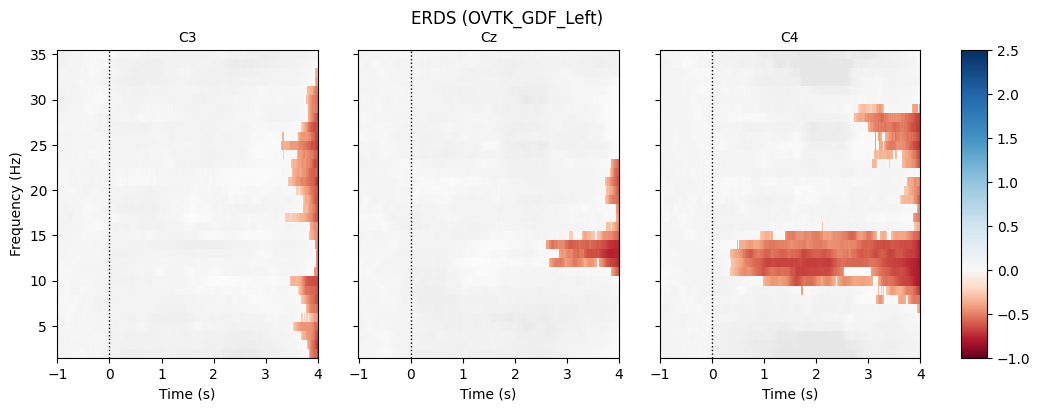

Using a threshold of 1.833113
stat_fun(H1): min=-14.308350 max=3.793588
Running initial clustering …
Found 42 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  308.09it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations


Using a threshold of -1.833113
stat_fun(H1): min=-14.308350 max=3.793588
Running initial clustering …
Found 53 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  328.81it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  351.69it/s]


Step-down-in-jumps iteration #2 found 1 additional cluster to exclude from subsequent iterations


100%|██████████| Permuting : 99/99 [00:00<00:00,  350.93it/s]

Step-down-in-jumps iteration #3 found 0 additional clusters to exclude from subsequent iterations


No baseline correction applied
Using a threshold of 1.833113
stat_fun(H1): min=-14.546648 max=4.594369
Running initial clustering …
Found 64 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  339.49it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  336.71it/s]


Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.833113
stat_fun(H1): min=-14.546648 max=4.594369
Running initial clustering …
Found 44 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  322.37it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  350.17it/s]


Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.833113
stat_fun(H1): min=-12.008400 max=4.989175
Running initial clustering …
Found 84 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  347.62it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  356.75it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.833113
stat_fun(H1): min=-12.008400 max=4.989175


Running initial clustering …
Found 48 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  353.63it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied


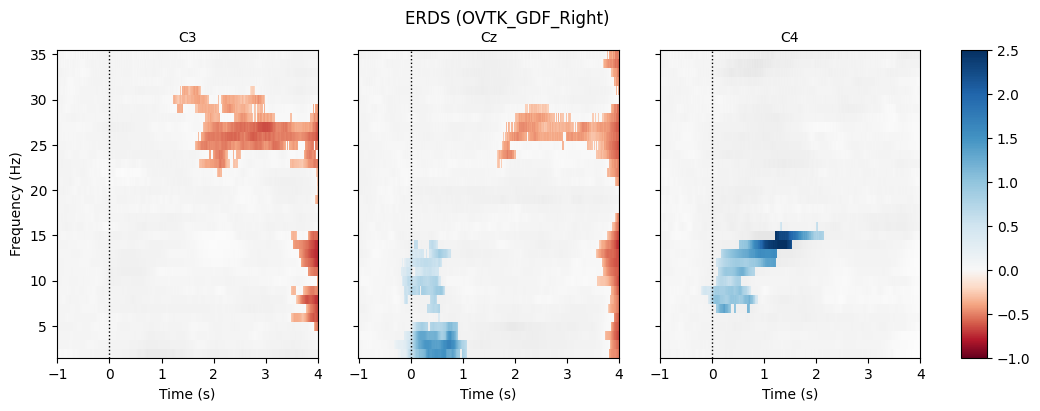

Using a threshold of 1.833113
stat_fun(H1): min=-9.260445 max=3.868141
Running initial clustering …
Found 25 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  303.31it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations


Using a threshold of -1.833113
stat_fun(H1): min=-9.260445 max=3.868141
Running initial clustering …
Found 85 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  310.82it/s]


Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.833113
stat_fun(H1): min=-11.178719 max=4.812210
Running initial clustering …
Found 67 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  312.10it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  338.78it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.833113
stat_fun(H1): min=-11.178719 max=4.812210
Running initial clustering …
Found 41 clusters



100%|██████████| Permuting : 99/99 [00:00<00:00,  356.90it/s]


Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.833113
stat_fun(H1): min=-11.631620 max=5.344333
Running initial clustering …
Found 57 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  362.92it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  369.05it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.833113
stat_fun(H1): min=-11.631620 max=5.344333
Running initial clustering …


Found 83 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  363.77it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied


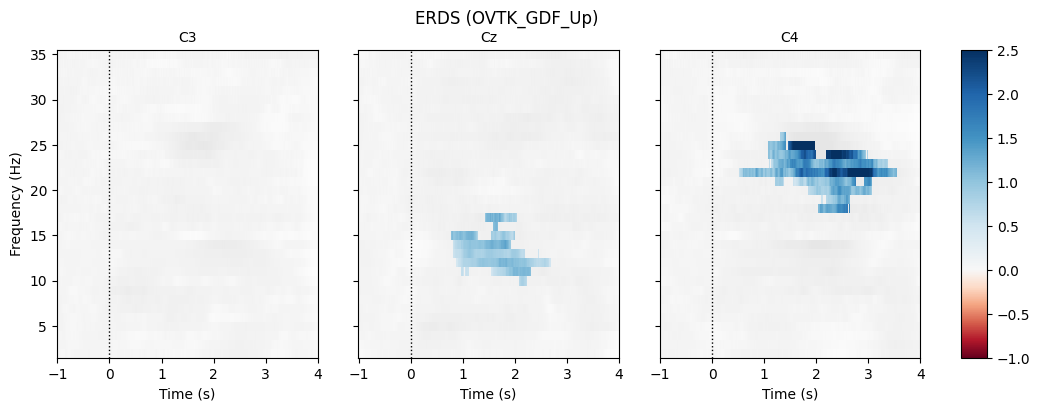

In [2173]:
tfr = tfr_multitaper(
    erds_epochs,
    freqs=freqs,
    n_cycles=freqs,
    use_fft=True,
    return_itc=False,
    average=False,
    decim=2,
)
tfr.crop(-1, 4).apply_baseline(baseline, mode="percent")

for event in event_ids:
    # select desired epochs for visualization
    tfr_ev = tfr[event]
    fig, axes = plt.subplots(
        1, 4, figsize=(12, 4), gridspec_kw={"width_ratios": [10, 10, 10, 1]}
    )
    for ch, ax in enumerate(axes[:-1]):  # for each channel
        # positive clusters
        _, c1, p1, _ = pcluster_test(tfr_ev.data[:, ch], tail=1, **kwargs)
        # negative clusters
        _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch], tail=-1, **kwargs)

        # note that we keep clusters with p <= 0.05 from the combined clusters
        # of two independent tests; in this example, we do not correct for
        # these two comparisons
        c = np.stack(c1 + c2, axis=2)  # combined clusters
        p = np.concatenate((p1, p2))  # combined p-values
        mask = c[..., p <= 0.05].any(axis=-1)

        # plot TFR (ERDS map with masking)
        tfr_ev.average().plot(
            [ch],
            cmap="RdBu",
            cnorm=cnorm,
            axes=ax,
            colorbar=False,
            show=False,
            mask=mask,
            mask_style="mask",
        )

        ax.set_title(epochs.ch_names[ch], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS ({event})")
    plt.show()

Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


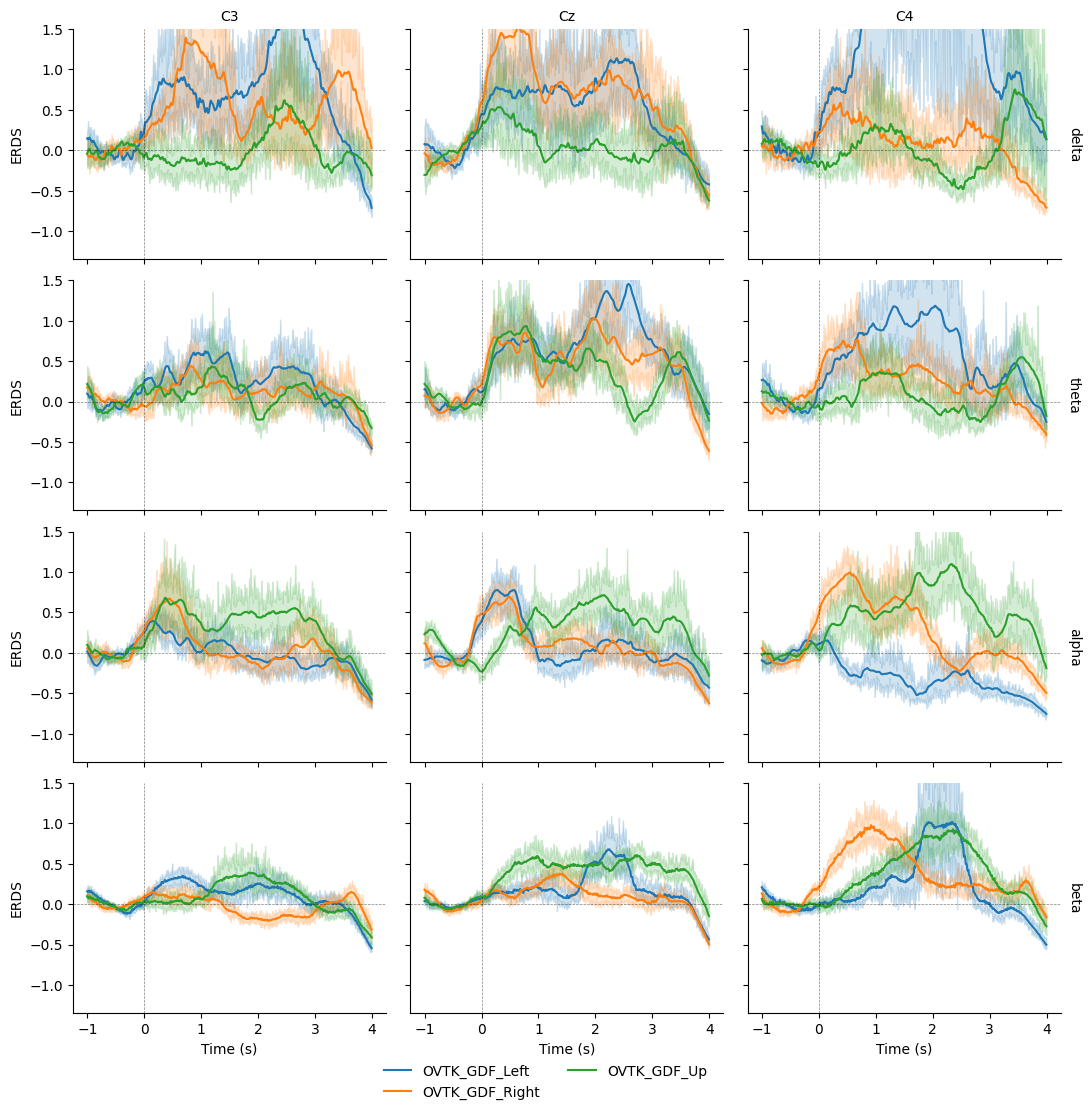

In [2174]:
df = tfr.to_data_frame(time_format=None, long_format=True)

# Map to frequency bands:
freq_bounds = {"_": 0, "delta": 3, "theta": 7, "alpha": 13, "beta": 35, "gamma": 140}
df["band"] = pd.cut(
    df["freq"], list(freq_bounds.values()), labels=list(freq_bounds)[1:]
)

# Filter to retain only relevant frequency bands:
freq_bands_of_interest = ["delta", "theta", "alpha", "beta"]
df = df[df.band.isin(freq_bands_of_interest)]
df["band"] = df["band"].cat.remove_unused_categories()

# Order channels for plotting:
df["channel"] = df["channel"].cat.reorder_categories(("C3", "Cz", "C4"), ordered=True)

g = sns.FacetGrid(df, row="band", col="channel", margin_titles=True)
g.map(sns.lineplot, "time", "value", "condition", n_boot=10)
axline_kw = dict(color="black", linestyle="dashed", linewidth=0.5, alpha=0.5)
g.map(plt.axhline, y=0, **axline_kw)
g.map(plt.axvline, x=0, **axline_kw)
g.set(ylim=(None, vmax))
g.set_axis_labels("Time (s)", "ERDS")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(ncol=2, loc="lower center")
g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)
plt.show()

- PSD

- CSP

- CWT

- STFT